In [74]:
import pandas as pd
import seaborn as sns 
import numpy as np

import matplotlib
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
from matplotlib.pyplot import figure


%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8)

#Read in the data 
df = pd.read_csv(r'C:\Users\mwill350\Downloads\movies.csv')


In [102]:
#Deleting null values 
df = df.dropna(axis = 0, subset = ['gross', 'writer', 'country', 'budget', 'company', 'runtime','rating'])

In [104]:
#Double checking for null values 
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [112]:
#Checking data types for columns 
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [132]:
#Reformating currency data to type- int
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [152]:
#Sort data by gross column
df = df.sort_values(by = ['gross'], inplace = False, ascending = False )

In [140]:
#Increase amount of rows that are visible 
pd.set_option('display.max_rows',None  )

In [198]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0


In [ ]:
#Hypothesis - budget & company will have a high correlation to gross revenue 


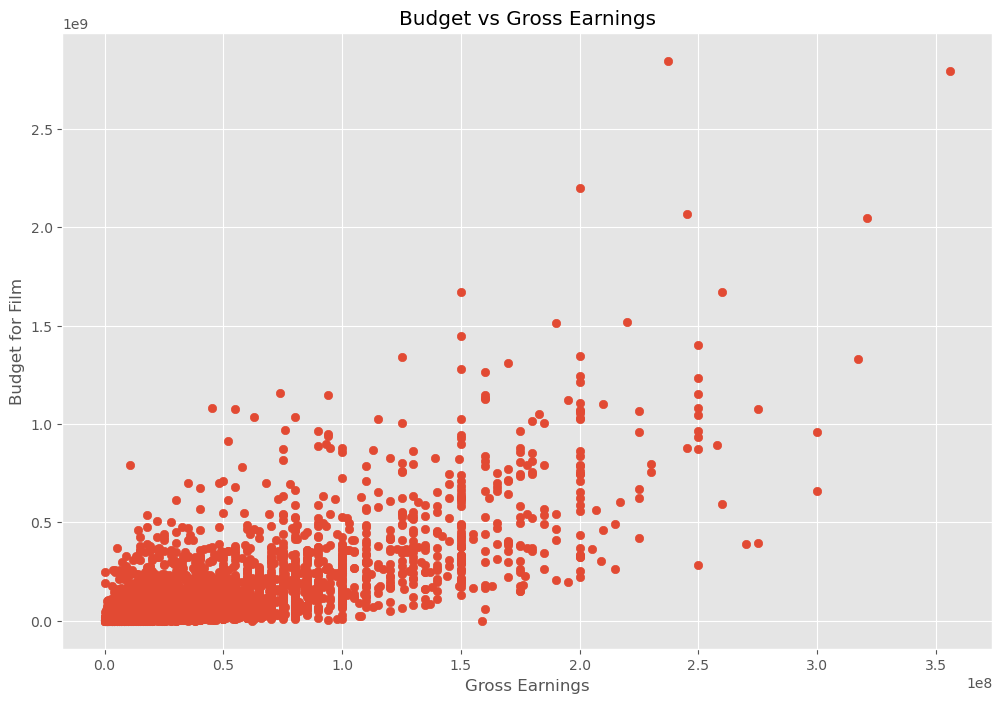

In [158]:
#Scatter plot with budget vs gross revenue 
plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [154]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


<Axes: xlabel='budget', ylabel='gross'>

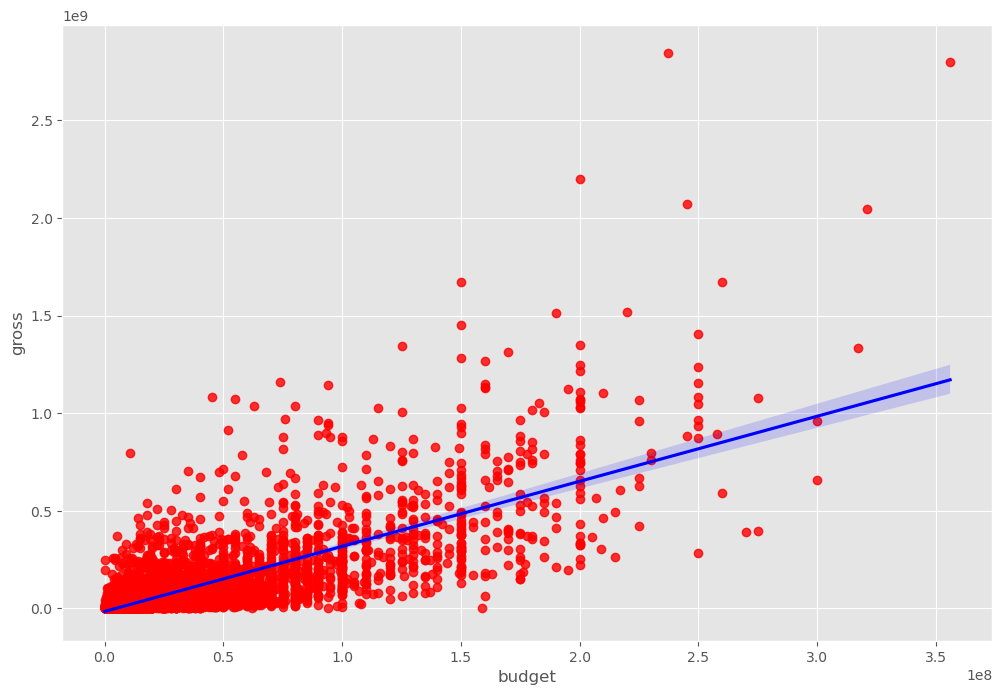

In [170]:
#Plot budget vs gross using seaborn
sns.regplot(x = 'budget', y ='gross', data = df, scatter_kws = {'color': 'red'}, line_kws = {'color': 'blue'})

In [172]:
#Evaluating Correlation 

In [196]:
df_numerized = df
for col_name in df_numerized.columns: 
    if(df_numerized[col_name].dtype == 'object'):
       df_numerized[col_name] = df_numerized[col_name].astype('category')
       df_numerized[col_name] = df_numerized[col_name].cat.codes 

df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0


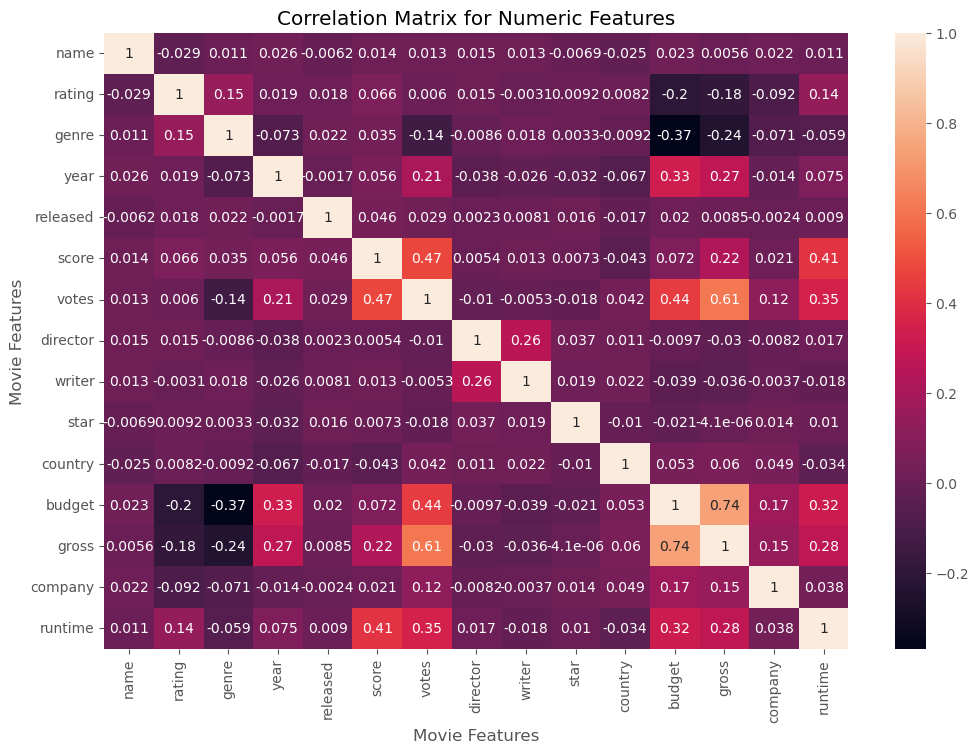

In [192]:
correlation_matrix = df_numerized.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [188]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values()
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes     gross       0.614751
gross     votes       0.614751
          budget      0.740247
budget    gross       0.740247
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
#Results - Votes & Budget have the highest correlation to gross earnings 
#Company has low correlation to gross earnings